# Résolution de systèmes linéaires par des méthodes de gradient

In [1]:
import numpy as np
from scipy.linalg import eigvals

from scipy.sparse.linalg import eigs
from scipy.sparse import diags
from matplotlib import pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column

output_notebook(hide_banner=True)

In [2]:
def show_level_set(a, b, xk, xexa, nlevel=8):
    """
    Trace les lignes de niveaux f(x) pour x = xk[0:nlevel] les premiers itérés d'une méthode de gradient
    pour un système (2x2)
    
    ----------
    a : ndarray (matrice du système) 
    b : ndarray (second membre du système)
    xk : ndarray (itérés de la méthode de gradient)
    xexa : ndarray (solution exacte)
    nlevel : nombre de lignes de niveaux correspondant au nlevel premiers itérés xk
    """
    
    def f(a, b, x1, x2):
        return 0.5*((a[0,0]*x1+a[0,1]*x2)*x1 + (a[1,0]*x1+a[1,1]*x2)*x2) - b[0]*x1 - b[1]*x2

    x1 = np.linspace(-0.5, 1., 200)
    x2 = np.linspace(-2.5, 0.5, 200)
    x1, x2 = np.meshgrid(x1, x2)

    z = f(a, b, x1, x2)

    level =  f(a, b, xk[0:nlevel,0], xk[0:nlevel,1])

    plt.figure(figsize=(7.5,15))
    plt.contour(x1, x2, z, np.flip(level))
    plt.plot(xk[0:nlevel,0], xk[0:nlevel,1], '--ro')
    plt.scatter(xexa[0], xexa[1])
    plt.show()

## Exemples de la PC

### Exemple 1

On considère un système $2\times 2$ pour lequel on pourra facilement visualiser le comportement des algorithmes :

\begin{equation*}
A=\begin{pmatrix}
7 & 0 \\
0 & 1
\end{pmatrix},\qquad b=\begin{pmatrix}
2 \\ -1
\end{pmatrix}
\end{equation*}


### Exemple 2

Un système de taille $N\times N$ (déjà étudié lors de la PC 6) qui correspond à une discrétisation du laplacien 1D, et sur lequel on pourra mettre à profit la structure creuse de $A$ :

\begin{equation*}
A =
\begin{pmatrix}
2/h^2    & -1/h    & 0       &\dots   & 0 \\
-1/h    & 2/h^2    & -1/h     & \ddots& \vdots  \\
0      & \ddots & \ddots &\ddots  &0\\
\vdots & \ddots & \ddots &\ddots  & -1/h\\
0      & \dots  &  0   &   -1/h  & 2/h^2
\end{pmatrix},
\qquad b =
\renewcommand{\arraystretch}{1.2}
\begin{pmatrix}
h^3 \\ (2h)^3 \\ \vdots \\ ((N-1)h)^3 \\ (Nh)^3
\end{pmatrix}, \qquad h=\frac{1}{N+1}.
\end{equation*}

## Gradient à pas fixe

**Ecrire une fonction qui implémente l'algorithme du gradient à pas fixe en prenant comme argument la matrice A, le vecteur b, le pas, le nombre maximal d'itérations, une tolérance sur l'erreur et retournant le tableau d'itérés de la méthode.**

In [3]:
def norme2(x) :
    N2 = 0
    for i in range (len(x)) :
        N2 += x[i]**2
    return np.sqrt(N2)

In [4]:
# Comme l'énoncé précise les arguments de notre fonction, et que x0 n'en fait pas partie, on prendra toujours x0 = 0
def fixed_step_gradient(a, b, alpha, nit_max=10000, eps=1.e-6):
    n = len(a)
    xk = np.zeros((1,n))
    grad = np.dot(a,xk[-1]) - b
    erreur = norme2(grad)
    i = 0
    while (erreur > eps) and (i<nit_max) :
        x = xk[-1] - alpha*(grad)
        xk = np.vstack((xk,x))
        grad = np.dot(a,xk[-1]) - b
        erreur = norme2(grad)
        i += 1
    return xk

### Exemple 1

**Utiliser l'algorithme du gradient à pas fixe pour résoudre le système de l'exemple 1. Tracer les lignes de niveaux de la fonction $f$, ainsi que les différents itérés obtenus. Montrer que l'on peut obtenir différents comportements en fonction du choix de $\alpha$.**

Pour alpha =  0.05  :


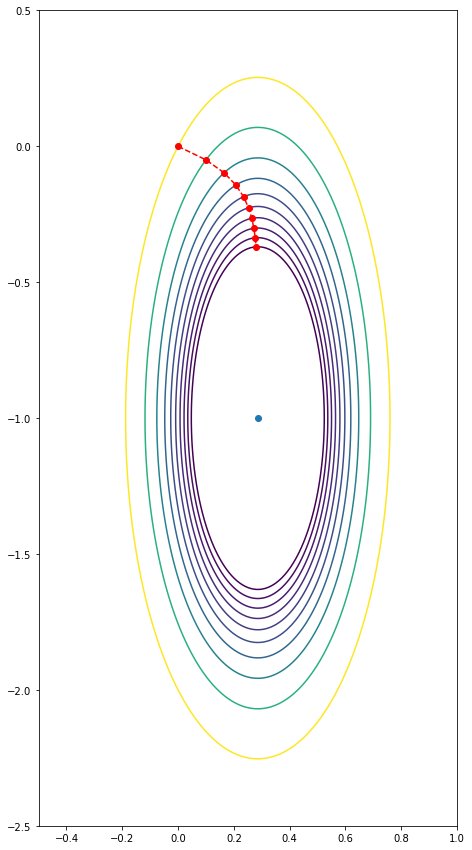

Après  10  itérations, l'erreur en norme 2 est ||xk[ 10 ]-xexa|| =  0.5987492947437715
L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte : 9.66881894770566e-07
cette solution est calculée en  270 itérations.

Pour alpha = 1/4 (taux de convergence maximal) :


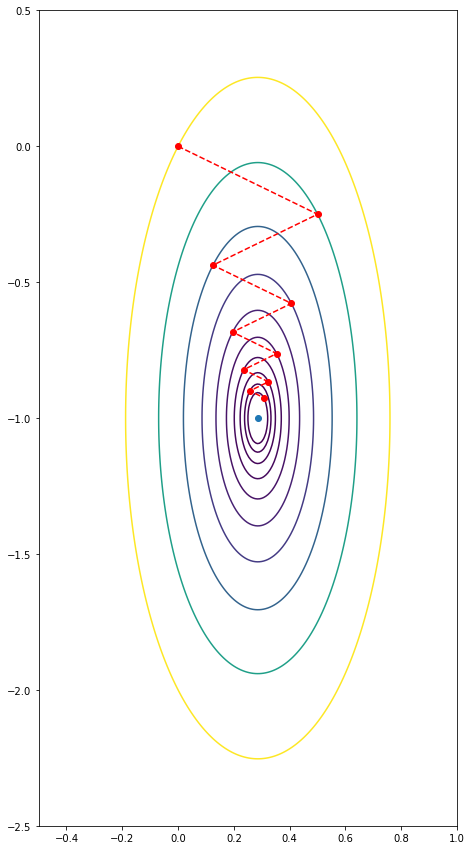

Après  10  itérations, l'erreur en norme 2 est ||xk[ 10 ]-xexa|| =  0.05856693933379654
L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte : 4.417375598631176e-07
cette solution est calculée en  51 itérations.

Pour alpha = 0.285 (2/7 = 0.285...)


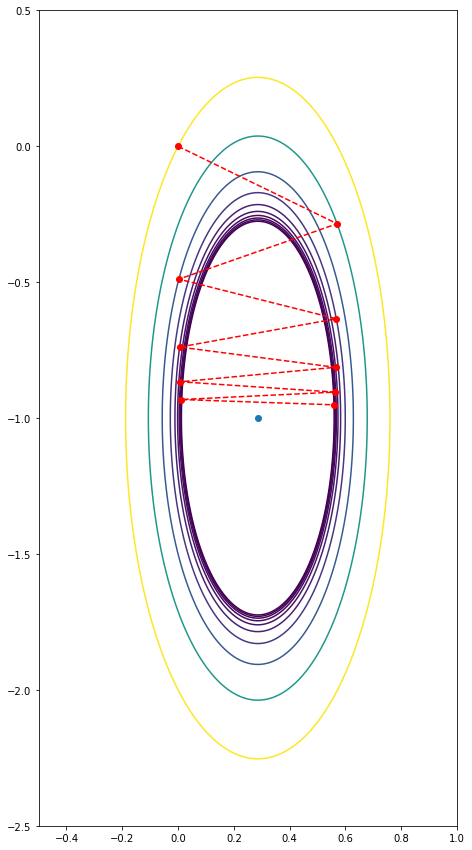

Après  10  itérations, l'erreur en norme 2 est ||xk[ 10 ]-xexa|| =  0.273980076472287
L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte : 1.4247895269159372e-07
cette solution est calculée en  2895 itérations.



In [6]:
nLN = 10 # nombre de lignes de niveaux à tracer
a = np.array([[7,0], [0,1]])
b = np.array([2,-1])
xexa = np.array([2/7,-1])

alpha = 0.05
print("Pour alpha = ",alpha," :")
xk = fixed_step_gradient(a, b, alpha)
show_level_set(a, b, xk, xexa, nLN)
print("Après ",nLN," itérations, l'erreur en norme 2 est ||xk[",nLN,"]-xexa|| = ",norme2(xk[nLN]-xexa))
print("L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte :",norme2(xk[-1]-xexa))
print("cette solution est calculée en ",len(xk)-1,"itérations.\n")

alpha = 1/4
print("Pour alpha = 1/4 (taux de convergence maximal) :")
xk = fixed_step_gradient(a, b, alpha)
show_level_set(a, b, xk, xexa, nLN)
print("Après ",nLN," itérations, l'erreur en norme 2 est ||xk[",nLN,"]-xexa|| = ",norme2(xk[nLN]-xexa))
print("L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte :",norme2(xk[-1]-xexa))
print("cette solution est calculée en ",len(xk)-1,"itérations.\n")

alpha = 0.285
print("Pour alpha = 0.285 (2/7 = 0.285...)")
xk = fixed_step_gradient(a, b, alpha)
show_level_set(a, b, xk, xexa, nLN)
print("Après ",nLN," itérations, l'erreur en norme 2 est ||xk[",nLN,"]-xexa|| = ",norme2(xk[nLN]-xexa))
print("L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte :",norme2(xk[-1]-xexa))
print("cette solution est calculée en ",len(xk)-1,"itérations.\n")

**Commentaire :**  
On a montré qu'on a convergence pour vecteur $x_0$ si et seulement si $0<\alpha<\frac{2}{\rho(A)}=2/7$.  
Dans cet exemple : la solution exacte est $x^*=(2/7, -1)$, $\rho(A) = 2/7$, et le taux de convergence est théoriquement maximal pour $\alpha = 2/(7+1) = 1/4$. C'est bien ce qu'on observe en faisant la simulation numérique, et en comparant le nombre d'itérations faites pour calculer la solution à la précision voulue avec les différentes valeurs de alpha.  
Pour $\alpha<0$ ou $\alpha > 2/7$ les calculs n'aboutissent pas, théoriquement rien ne garantit la convergence.

### Exemple 2

**Utiliser l'algorithme du gradient à pas fixe pour résoudre le système de l'exemple 2 avec $N=4$, puis $N=64$, en utilisant le pas $\alpha$ optimal obtenu à la question précédente. On pourra calculer numériquement la plus petite et la plus grande valeur propre de $A$ à l'aide de la fonction *scipy.sparse.linalg.eigs*. Observer le taux de convergence, et comparer avec la majoration théorique. On pourra afficher l'erreur après l'itération $k+1$ en fonction de l'erreur après l'itération $k$. Observer également la solution obtenue après $10^3$ itérations, et l'erreur avec la solution théorique. Commenter.**

In [9]:
N = 64

# Construction de a
h = 1/(N+1)
c1 =-1/(h*h)
c2 = 2/(h*h)
a = np.array(c2*np.eye(N))
for i in range(1,N) :
    a[i][i-1] = a[i-1][i] = c1

# Construction de b
b = np.array([(i*h)**3 for i in range(1,N+1)])

# Calcul de alpha optimal
vp = np.linalg.eig(a)
vp_abs = abs(vp[0])
vp_max = vp_min = vp_abs[0]
for v in vp_abs :
    vp_max = max(v, vp_max)
    vp_min = min(v, vp_min)
alpha = 2/(vp_max + vp_min)

# Calcul de xk
xk = fixed_step_gradient(a, b, alpha,1000)

# solution exacte et erreur
xexa = np.linalg.solve(a, b)
vect_erreur = xk - xexa
err = np.array([ norme2(v) for v in vect_erreur ])
print("après 1000 itérations, l'erreur entre la solution obtenue et la solution exacte est : ",err[-1])

# Calcul du taux de convergence théorique
taux_th = (vp_max - vp_min)/(vp_max + vp_min)
print("Le taux théorique maximal est : ", taux_th)

# taux de convergence ponctuel max
all_taux = err[1:]/err[:-1]
taux = all_taux[0]
for v in all_taux :
    taux = max(taux, v)
print("Le taux de convergence ponctuel max est : ", taux)
print("Le taux de convergence moyen est : ", sum(all_taux)/len(all_taux))
print("(taux de convergence) < (taux théorique maximal) ? ... ",taux<=taux_th)

# Figure
fig = figure(width=490, height=300)
# la courbe orange représente le cas limite où err[k+1]=taux_th*err[k]
fig.line(err[:-1], taux_th*err[:-1], legend = "pente max théorique", color = "orange") 
fig.line(err[:-1], err[1:], legend ="err[k+1] = g(err[k])")
fig.legend.location = "top_left"
show(fig)

après 1000 itérations, l'erreur entre la solution obtenue et la solution exacte est :  0.044804137401264515
Le taux théorique maximal est :  0.9988322268323268
Le taux de convergence ponctuel max est :  0.9988319972376446
Le taux de convergence moyen est :  0.998792446180678
(taux de convergence) < (taux théorique maximal) ? ...  True


**Commentaire :**  
On obtient que tous les rapports $err[k+1]/err[k]$ sont inférieurs au taux théorique maximal, ce qui confirme le résultat théorique. Pour mieux visualiser ce résultat, j'ai tracé la courbe correspondant au cas où $\forall k\in \mathbb{N} \quad err[k+1] = t.err[k]$ où $t = (\lambda_n - \lambda_1)/(\lambda_n + \lambda_1)$ est le taux théorique maximal, on remarque alors que les 2 courbes sont quasi-identiques, mais la pente de la courbe expérimentale reste toujours inférieure à celle de la courbe théorique maximale.

## Gradient à pas optimal

**Ecrire une fonction qui implémente l'algorithme du gradient à pas optimal en prenant comme argument la matrice A, le vecteur b, le nombre maximal d'itérations, une tolérance sur l'erreur et retournant le tableau d'itérés de la méthode.**

In [11]:
# Comme l'énoncé précise les arguments de notre fonction, et que x0 n'en fait pas partie, on prendra toujours x0 = 0
def optimal_step_gradient(a, b, nit_max=10000, eps=1.e-6):
    n = len(a)
    xk = np.zeros((1,n))
    grad = np.dot(a,xk[-1]) - b
    erreur = norme2(grad)
    i = 0
    while (erreur > eps) and (i<nit_max) :
        c = sum(np.dot(a,grad)*grad) # produit scalaire de a.grad par grad : <a.grad, grad>
        if c==0 :
            break
        alpha = (norme2(grad)**2)/c
        x = xk[-1] - alpha*(grad)
        xk = np.vstack((xk,x))
        grad = np.dot(a,xk[-1]) - b
        erreur = norme2(grad)
        i += 1
    return xk

**Commentaire :**  
On a $\forall k \in \mathbb{N} \quad \alpha_k = \frac{||r_k||_2^2}{<Ar_k,r_k>}$. où $r_k$ est stocké à chaque itération dans ma variable *grad*

### Exemple 1

**Utiliser l'algorithme du gradient à pas optimal pour résoudre le système de l'Exemple 1. Tracer les lignes de niveaux de la fonction $f$, ainsi que les différents itérés obtenus.**

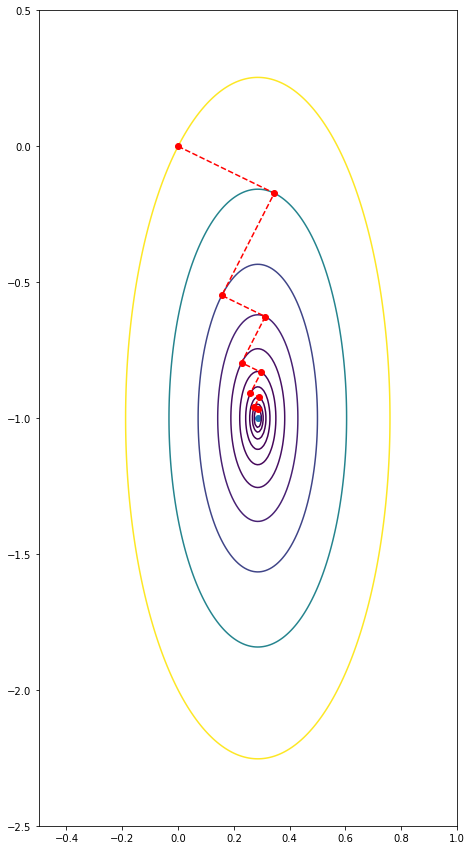

Après  10  itérations, l'erreur en norme 2 est ||xk[ 10 ]-xexa|| =  0.019493909250643603
L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte : 5.025865753808535e-07
cette solution est calculée en  37 itérations.



In [12]:
nLN = 10 # nombre de lignes de niveaux à tracer
a = np.array([[7,0], [0,1]])
b = np.array([2,-1])
xexa = np.array([2/7,-1])

xk = optimal_step_gradient(a, b)
show_level_set(a, b, xk, xexa, nLN)
print("Après ",nLN," itérations, l'erreur en norme 2 est ||xk[",nLN,"]-xexa|| = ",norme2(xk[nLN]-xexa))
print("L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte :",norme2(xk[-1]-xexa))
print("cette solution est calculée en ",len(xk)-1,"itérations.\n")

### Exemple 2

**Utiliser l'algorithme du gradient à pas optimal pour résoudre le système de l'Exemple 2 avec $N=4$, puis $N=64$. Observer le taux de convergence, et comparer avec le résultat de l'exercice précédent. On pourra afficher l'erreur après l'itération $k+1$ en fonction de l'erreur après l'itération $k$. Observer également la solution obtenue après $10^3$ itérations, et l'erreur avec la solution théorique. Commenter.**

In [13]:
N = 64

# Construction de a
h = 1/(N+1)
c1 =-1/(h*h)
c2 = 2/(h*h)
a = np.array(c2*np.eye(N))
for i in range(1,N) :
    a[i][i-1] = a[i-1][i] = c1

# Construction de b
b = np.array([(i*h)**3 for i in range(1,N+1)])

# Calcul de xk
xk = optimal_step_gradient(a, b, 1000)

# solution exacte et erreur
xexa = np.linalg.solve(a, b)
vect_erreur = xk - xexa
err = np.array([ norme2(v) for v in vect_erreur ])
print("après 1000 itérations, l'erreur entre la solution obtenue et la solution exacte est : ",err[-1])

# Calcul du taux de convergence théorique
vp = np.linalg.eig(a)
vp_abs = abs(vp[0])
vp_max = vp_min = vp_abs[0]
for v in vp_abs :
    vp_max = max(v, vp_max)
    vp_min = min(v, vp_min)
taux_th = (vp_max - vp_min)/(vp_max + vp_min)
print("Le taux théorique maximal est : ", taux_th)

# taux de convergence ponctuel max
all_taux = err[1:]/err[:-1]
taux = all_taux[0]
for v in all_taux :
    taux = max(taux, v)
print("Le taux de convergence ponctuel max est : ", taux)
print("Le taux de convergence moyen est : ", sum(all_taux)/len(all_taux))
print("(taux de convergence ponctuel) < (taux théorique maximal) ? ... ",taux<=taux_th)

# Figure
fig = figure(width=490, height=300)
# la courbe orange représente le cas limite où err[k+1]=taux_th*err[k]
fig.line(err[:-1], taux_th*err[:-1], legend = "pente max théorique", color = "orange") 
fig.line(err[:-1], err[1:], legend ="err[k+1] = g(err[k])")
fig.legend.location = "top_left"
show(fig)


après 1000 itérations, l'erreur entre la solution obtenue et la solution exacte est :  0.043765849776247305
Le taux théorique maximal est :  0.9988322268323268
Le taux de convergence ponctuel max est :  0.9988604540552575
Le taux de convergence moyen est :  0.9987693916460092
(taux de convergence ponctuel) < (taux théorique maximal) ? ...  False


**Commentaire :**  
En observant la courbe err[k+1] en fonction de err[k], on constate qu'elle a une pente légèrement inférieure à la pente théorique maximale.
Bien que les deux méthodes de gradient à pas fixe et gradient à pas optimal soient toutes les deux satisfaisantes, les résultats expérimentaux montrent que la méthode de gradient à pas optimal est (légèrement) meilleure. C'est ce qu'on peut constater en comparant le nombre d'itérations necessaires pour atteindre une précision donnée. Par exemple, pour l'exemple 1 de la PC, et pour $eps = 10^{-7}$, il faut 52 itérations en utilisant la valeur optimale de $\alpha$ dans l'algorithme du gradient à pas fixe, et 37 itérations en utiliant l'algorithme du gradient à pas optimal.

## Gradient conjugué

**Ecrire une fonction qui implémente l'algorithme du gradient conjugué en prenant comme argument la matrice A, le vecteur b, le nombre maximal d'itérations, une tolérance sur l'erreur et retournant le tableau d'itérés de la méthode.**

In [14]:
# Comme l'énoncé précise les arguments de notre fonction, et que x0 n'en fait pas partie, on prendra toujours x0 = 0
def conjugate_gradient(a, b, nit_max, eps=1.e-6):
    n = len(a)
    xk = np.zeros((1,n))
    gk = np.dot(a,xk[-1]) - b
    dk = -gk
    err = 1
    for i in range(0,n) :
        if norme2(gk)<eps or i>nit_max or sum(gk*gk)==0 : # cad si la norme carrée de gk =0, et donc gk est nul
            break
        normeA2_dk = sum(dk*np.dot(a,dk)) 
        gamma = - sum(dk*gk)/normeA2_dk
        x = xk[-1] + gamma*dk
        xk = np.vstack((xk,x))
        gk = np.dot(a,x) - b
        beta = sum(gk*np.dot(a,dk)) / normeA2_dk
        dk = - gk + beta*dk
    return xk

### Exemple 1

**Utiliser l'algorithme du gradient conjugué pour résoudre le système de l'Exemple 1. Tracer les lignes de niveaux de la fonction $f$, ainsi que les différents itérés obtenus.**

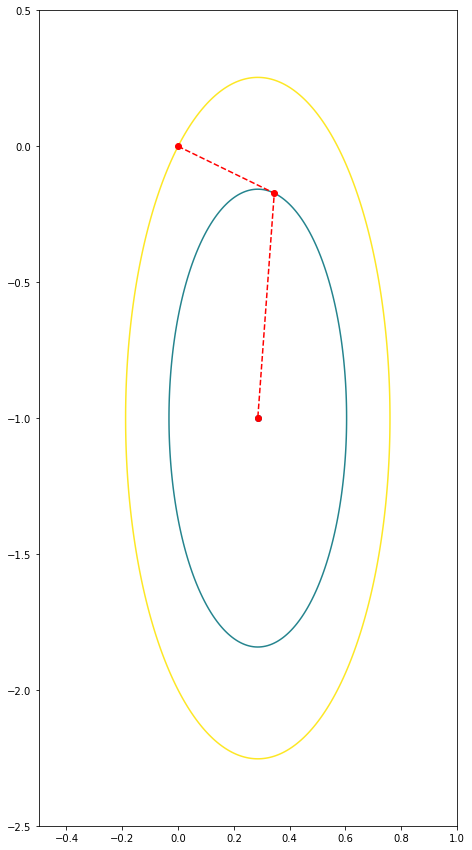

L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte : 5.551115123125783e-17
cette solution est calculée en  2 itérations.



In [15]:
nLN = 15 # nombre de lignes de niveaux à tracer
nit_max = 1 # nombre d'itérations max
a = np.array([[7,0], [0,1]])
b = np.array([2,-1])
xexa = np.array([2/7,-1])

xk = conjugate_gradient(a,b, nit_max)
show_level_set(a, b, xk, xexa, nLN)

print("L'erreur entre la solution finale (non représentée sur la figure) et la solution exacte :",norme2(xk[-1]-xexa))
print("cette solution est calculée en ",len(xk)-1,"itérations.\n")

### Exemple 2

**Utiliser l'algorithme du gradient conjugué pour résoudre le système de l'Exemple 2 avec $N=4$, puis $N=64$. Observer qu'il converge en au plus $N$ itérations. On pourra légèrement modifier le critère d'arrêt.**

In [16]:
N = 64
nit_max = 100
eps = 1.e-15

# Construction de a
h = 1/(N+1)
c1 =-1/(h*h)
c2 = 2/(h*h)
a = np.array(c2*np.eye(N))
for i in range(1,N) :
    a[i][i-1] = a[i-1][i] = c1

# Construction de b
b = np.array([(i*h)**3 for i in range(1,N+1)])

# Calcul de xk
xk = conjugate_gradient(a,b, nit_max, eps)

# solution exacte et erreur
xexa = np.linalg.solve(a, b)
vect_erreur = xk - xexa
err = np.array([ norme2(v) for v in vect_erreur ])
print("L'erreur en norme 2 entre la solution calculée et la solution exacte est : ", norme2(xk[-1]-xexa))
print("cette solution est calculée en ",len(xk)-1," itérations")

# Figure
fig = figure(width=490, height=300, y_axis_type="log")
fig.line(np.array([i for i in range(len(xk))]), err, legend ="err[k] en fonction de k")
show(fig)

L'erreur en norme 2 entre la solution calculée et la solution exacte est :  1.2237314563421794e-15
cette solution est calculée en  64  itérations


**Commentaire :**  
La méthode du gradient conjugué fournit une convergence très rapide.  
Conformement au résultat théorique, on a toujours convergence avec une précision aussi petite qu'on veut en moins de $N$ itérations !  
J'ai modifié la condition d'arrêt de l'algorithme du gradient conjugué dans ma fonction pour s'arrêter lorsqu'on a une précision satisfaisante. Pour $N=64$ on a la solution avec une précision de $10^{-20}$ rien qu'en 8 itérations.